<a href="https://colab.research.google.com/github/Camilo-Hernandez/Inteligencia-Computacional/blob/main/Filtrado%26MFCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CLAUDIA VICTORIA ISAZA NARVAEZ
mar, 14 jun, 14:18
para bcc: mí

Buen día a todos,

De acuerdo al cronograma el próximo martes 21 de junio  (en el horario de clase) ustedes tienen el avance del proyecto.  Los compañeros que asisten de manera virtual a la clase, deben asistir presencial para poder realizar la actividad.

Varios me han preguntado si se debe implementar el algoritmo de Inteligencia Computacional.  El algoritmo no lo deben tener aún.

Cada pareja debe hacer una presentación  de apx 5 minutos con:
- Descripción del problema
-Un cuadro comparativo donde resuman los artículos más relevantes (o que les parecen más útiles) que han leído en relación con el proyecto.  El cuadro debe  tener las siguientes columnas:
Nombre del artículo, año de publicación del artículo, lista de  variables (características o descriptores)  que usaron en el artículo, técnica de Inteligencia Computacional que usaron, Desventaja o ventaja que encuentran del artículo (dos o tres palabras).
Cada fila corresponde a cada uno de los artículos que consideran relevante para el proyecto de curso.
- Base de datos ya lista para entrar al algoritmo de int artificial:
Es decir tener los datos con los que van a trabajar, haber seleccionado las variables que van a entrar al algoritmo. Si las van a normalizar ya deben estar normalizadas
Y demostrar la razón por la que eligieron esas variables (características o descriptores).
Es el equivalente al archivo excel que les envié para la tarea, e incluyendo la selección de variables.

Para la presentación cada pareja debe preparar diapositivas.

Cordialmente,

Claudia Isaza
Profesora 
Facultad de Ingeniería

# Descripción del problema

- Implementar un algoritmo de inteligencia computacional que nos permita detectar y clasificar comandos por voz para controlar un carrito mediante técnicas de procesamiento digital de señales y aprendizaje supervisado.
- Antecedentes:
  - Referencia 1.
  - Referencia 2.
  - Referencia 3.

# 0. Configuración del entorno

In [1]:
# Se monta el contenido de drive para acceder al dataset almacenado en la nube
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [10]:
# Se cambia el directorio con el comando cd para ir a la carpeta del proyecto
%cd '/content/drive/MyDrive/Fundamentos de Inteligencia Computacional/Carrito controlado por voz/Dataset-audios/'

# Se verifica el contenido de la carpeta para confirmar la ubicación
%ls -r
%pwd

/content/drive/MyDrive/Fundamentos de Inteligencia Computacional/Carrito controlado por voz/Dataset-audios
Retrocede/  Ninguno/  Izquierda/  Derecha/  Adelante/


'/content/drive/MyDrive/Fundamentos de Inteligencia Computacional/Carrito controlado por voz/Dataset-audios'

In [3]:
#for i in range(26,72):
  #os.rename(f'Re{i}.wav', f'Re{i-5}.wav')

In [4]:
#path = '/content/drive/MyDrive/Fundamentos de Inteligencia Computacional/Carrito controlado por voz/Dataset-audios/Derecha/'
#ldseg = np.array(os.listdir(path))
#len(ldseg)
#ldseg

In [5]:
# Se importan las librerías necesarias para todo el proyecto
import os
from librosa import load, feature # para leer archivos .wav
from librosa import display as dp
import numpy as np # para álgebra lineal
from scipy.signal import butter, filtfilt # para análisis de señales
import matplotlib.pyplot as plt # para graficar
#!pip install python_speech_features # comentar y descomentar
#from python_speech_features import mfcc, logfbank # para la extracción de las características mfcc
from ipywidgets import interact # para interactuar con IPython
from IPython.display import Audio # para reproducir audios en IPython

# 1. Parte 1: Pre-procesamiento
## 1. a. Centrado y Normalización

In [6]:
def filtro(orden, cutoff):
  '''
  Realiza un filtrado de los audios con un butter a una señal de audio
  Recibe el orden y la frecuencia de corte normalizada
  Retorna el audio filtrado
  '''
  b, a = butter(orden, cutoff, btype="lp")
  audio_filt = filtfilt(b,a,audio)
  return audio_filt

DB = []
for carpeta in ['Izquierda','Derecha','Adelante','Retrocede','Ninguno']:
  path = f'{carpeta}/'
  ldseg = np.array(os.listdir(path))
  for i in range(len(ldseg)):
    # a. Se carga el archivo
    audio_path = f'{carpeta}/{carpeta[:2]}{i+1}.wav'
    audio, fs = load(audio_path, sr = 44100, mono = True)
    # b. Se remueve el nivel DC
    nivelDC = np.mean(audio)
    audio = audio - nivelDC
    # c. Se normaliza para adquirir amplitud unitaria (escalado)
    audio = audio/float(max(abs(audio)))
    # d. Se filtra
    audio_filt=filtro(10,0.36)
    # e. Se extraen las características y se concatenan
    mfccs = feature.mfcc(audio_filt, sr=fs, n_mfcc=13)
    mfccs_delta = feature.delta(mfccs)
    mfccs_delta2 = feature.delta(mfccs, order = 2)
    comprehensive_mfccs = np.concatenate((mfccs, mfccs_delta, mfccs_delta2))
    # f. Se almacena en una lista
    if carpeta == 'Adelante':
      t = 1
    elif carpeta == 'Retrocede':
      t = 2
    elif carpeta == 'Derecha':
      t = 3
    elif carpeta == 'Izquierda':
      t = 4
    elif carpeta == 'Ninguno':
      t = 5
    DB.append((comprehensive_mfccs, t))

In [ ]:
DB

In [8]:
# Se importa el audio, se normaliza y se reproduce para confirmar su correcto estado
# a. Se carga el archivo
audio_path = 'Izquierda/Iz2.wav'
audio, fs = load(audio_path, sr = 44100, mono = True)
print('Frecuencia de muestreo: ',fs)
print('Canales de audio: ',len(audio.shape))
# b. Se remueve el nivel DC
nivelDC = np.mean(audio)
audio = audio - nivelDC
# c. Se normaliza para adquirir amplitud unitaria (escalado)
audio = audio/float(max(abs(audio)))
# d. Se construye el vector de tiempo
t=np.arange(0, float(len(audio))/fs, 1.0/fs)
Audio(audio,rate=fs)

Frecuencia de muestreo:  44100
Canales de audio:  1


## 1. b. Filtrado de las frecuencias superiores con filtro Butterworth
Se filtran las frecuencias que no contribuyen a la energía de la señal de voz.

In [ ]:
@interact(orden=(1, 13, 1), cutoff=(0.005, .5, 0.01))
def filtro(orden, cutoff):
  # Orden 6
  # fc = 2550 Hz
  b, a = butter(orden, cutoff, btype="lp")
  audio_filt = filtfilt(b,a,audio)
  plt.figure(figsize=(20,5))
  plt.subplot(1,3,1)
  plt.plot(t, audio, color='silver', label='Original')
  plt.plot(t, audio_filt, color='#3465a4', label='Filtrado')
  plt.grid(True, which='both')
  plt.legend(loc="best")
  plt.subplot(2,2,2)
  plt.psd(audio,Fs=fs)
  plt.xlim([0,10000])
  plt.subplot(2,2,4)
  plt.psd(audio_filt, Fs=fs)
  plt.xlim([0,10000])
  return audio_filt

interactive(children=(IntSlider(value=7, description='orden', max=13, min=1), FloatSlider(value=0.245, descrip…

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


(0.0, 10000.0)

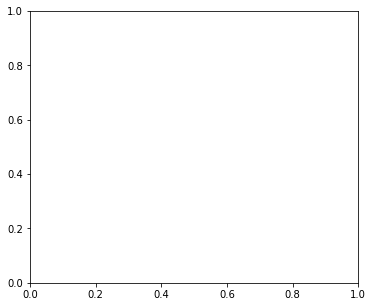

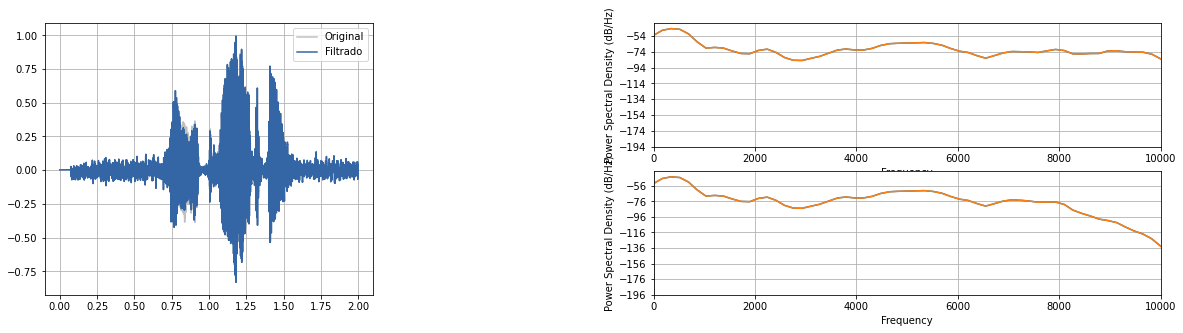

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
audio_filt=filtro(10,0.36)
Audio(audio_filt, rate=fs) # para escuchar la senal, si se desea
plt.subplot(2,2,2)
plt.psd(audio,Fs=fs)
plt.xlim([0,10000])
plt.subplot(2,2,4)
plt.psd(audio_filt, Fs=fs)
plt.xlim([0,10000])

# 2. Extracción de características usando Coeficientes Ceptrales de Mel-Frecuencia

(13, 173)


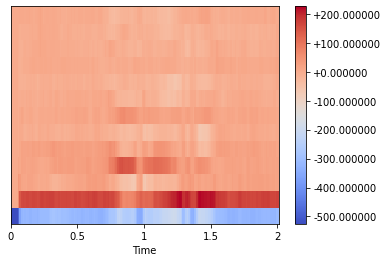

In [ ]:
mfccs = feature.mfcc(audio_filt, sr=fs, n_mfcc=13)
print(mfccs.shape)
dp.specshow(mfccs, x_axis="time", sr=fs)
plt.colorbar(format="%+2f")
plt.show()

In [ ]:
mfccs_delta = feature.delta(mfccs)
mfccs_delta2 = feature.delta(mfccs, order = 2)

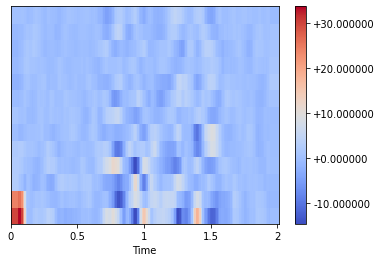

In [ ]:
dp.specshow(mfccs_delta, x_axis="time", sr=fs)
plt.colorbar(format="%+2f")
plt.show()

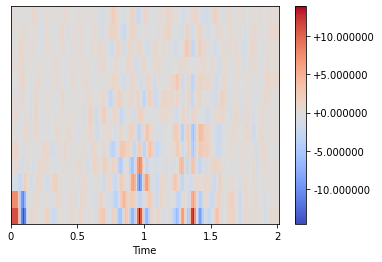

In [ ]:
dp.specshow(mfccs_delta2, x_axis="time", sr=fs)
plt.colorbar(format="%+2f")
plt.show()

In [ ]:
comprehensive_mfccs = np.concatenate((mfccs, mfccs_delta, mfccs_delta2))
#np.all(comprehensive_mfccs == DB[1][0])

### 2. b. Eligiendo las características más significativas/representativas a través de Análisis de Componentes Principales

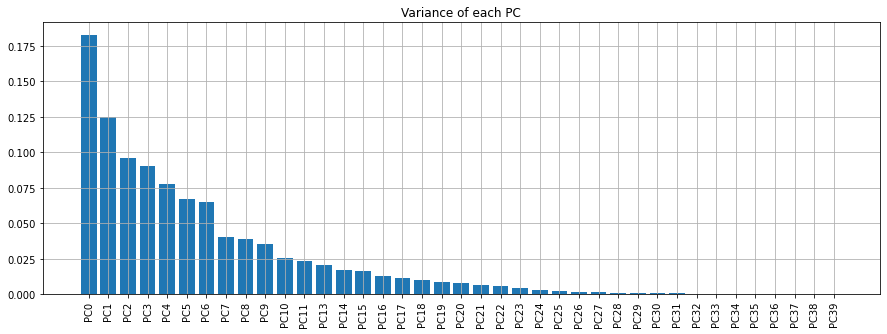

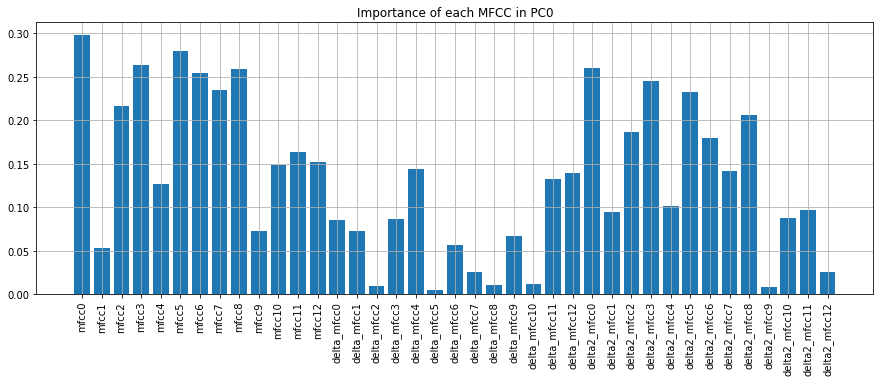

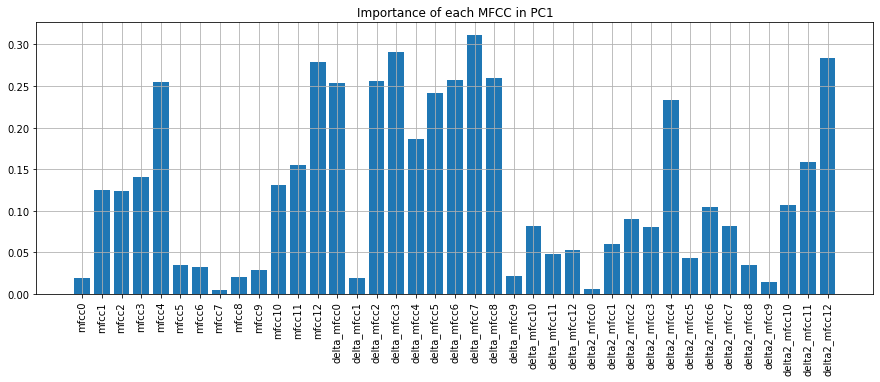

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
columnsMFCCs = [f'mfcc{i}' for i in range(13)]+[f'delta_mfcc{i}' for i in range(13)]+[f'delta2_mfcc{i}' for i in range(13)]
columnsPCAs = [f'PC{i}' for i in range(12)]+[f'PC{i}' for i in range(12,26)]+[f'PC{i}' for i in range(26,39)]
dF = pd.DataFrame(data=comprehensive_mfccs.T, columns=columnsMFCCs)
scaler = StandardScaler()
scaler.fit(dF)
dF=scaler.transform(dF)    
pca = PCA()
x_new = pca.fit_transform(dF)

plt.figure(figsize=(15,5))
plt.bar(columnsPCAs, abs(pca.explained_variance_ratio_))
plt.title('Variance of each PC')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

plt.figure(figsize=(15,5))
plt.bar(columnsMFCCs,abs(pca.components_[0]))
plt.title('Importance of each MFCC in PC0')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

plt.figure(figsize=(15,5))
plt.bar(columnsMFCCs,abs(pca.components_[1]))
plt.title('Importance of each MFCC in PC1')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()